In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp

In [ ]:
#1)

In [12]:
weeks = np.arange(1, 6, 1)
infected = np.array([3, 128, 115, 1050, 13500])
n = weeks.size

In [21]:
#Ще използваме базиса на експоненциалните полиноми, тъй като данните в таблицата, както можем да видим растат много бързо :)

A = np.zeros([n ,n])
def fill_exponential_matrix(A, t, n):
    for i in range(n):
        for j in range(n):
            A[i][j] = np.exp(t[i] * j)

fill_exponential_matrix(A, weeks, n)

In [23]:
sol = np.linalg.solve(A, infected)
sol

array([-1.25108444e+02,  5.58898887e+01, -3.40051155e+00,  6.60076859e-02,
       -2.79386709e-04])

In [27]:
def get_polynomial_exponential(sol, x):
    poly = 0
    for i in range(sol.size):
        poly += sol[i] * np.exp(x * i)
    return poly

x_axis = np.linspace(1, 5, 1000)
poly_1 = get_polynomial_exponential(sol, x_axis)
poly_1

array([3.00000000e+00, 3.42327933e+00, 3.84756944e+00, 4.27286936e+00,
       4.69917808e+00, 5.12649456e+00, 5.55481770e+00, 5.98414637e+00,
       6.41447941e+00, 6.84581560e+00, 7.27815371e+00, 7.71149242e+00,
       8.14583043e+00, 8.58116634e+00, 9.01749875e+00, 9.45482620e+00,
       9.89314719e+00, 1.03324602e+01, 1.07727636e+01, 1.12140557e+01,
       1.16563350e+01, 1.20995996e+01, 1.25438478e+01, 1.29890779e+01,
       1.34352879e+01, 1.38824759e+01, 1.43306400e+01, 1.47797781e+01,
       1.52298884e+01, 1.56809685e+01, 1.61330165e+01, 1.65860300e+01,
       1.70400070e+01, 1.74949450e+01, 1.79508417e+01, 1.84076948e+01,
       1.88655017e+01, 1.93242601e+01, 1.97839673e+01, 2.02446208e+01,
       2.07062179e+01, 2.11687558e+01, 2.16322320e+01, 2.20966434e+01,
       2.25619873e+01, 2.30282607e+01, 2.34954606e+01, 2.39635841e+01,
       2.44326280e+01, 2.49025892e+01, 2.53734644e+01, 2.58452504e+01,
       2.63179439e+01, 2.67915416e+01, 2.72660398e+01, 2.77414353e+01,
      

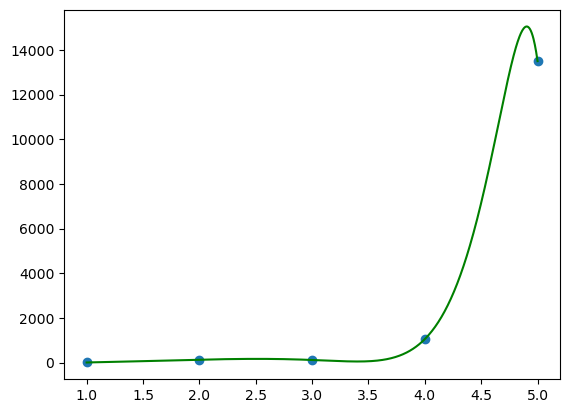

In [29]:
plt.plot(x_axis, poly_1, color = 'green')
plt.scatter(weeks, infected)
plt.show()

In [35]:
#2

In [37]:
def f(x):
    return np.log(x ** 3)

t0 = 0.2
t1 = 0.3
mult0 = 2
mult1 = 1

xi = np.array([0.2, 0.2, 0.3])
x = sp.Symbol('x')
expr = sp.log(x ** 3)
derivative_expr = sp.diff(expr, x)
derivative = derivative_expr.subs(x, 0.2)

yi =  np.array([f(0.2), derivative, f(0.3)])

m = {0.2:f(0.2), 0.3:f(0.3)}

In [39]:
x_axis = np.linspace(0.2, 0.3, 1000)


In [41]:
#x = sp.symbols('x')

def divided_dif(xi, yi):
    
    if len(xi) == 1:
        return m[xi[0]]
    if xi[0] == xi[-1]:
        return yi[-1] / math.factorial(len(xi)-1)
    return (divided_dif(xi[1:], yi[1:]) - divided_dif(xi[:-1], yi[:-1])) / (xi[-1] - xi[0])
 
def second_part(xi, x):
    res = 1
    for el in xi:
        res *= (x - el)
    return res
 
def get_ermit_poli(xi, yi, x):
    res = 0
    for i in range(len(xi)):
        dd = divided_dif(xi[:i+1], yi[:i+1])
        
        res += dd * second_part(xi[:i], x) 
    return res

In [43]:
poly = (get_ermit_poli(xi, yi, x_axis))

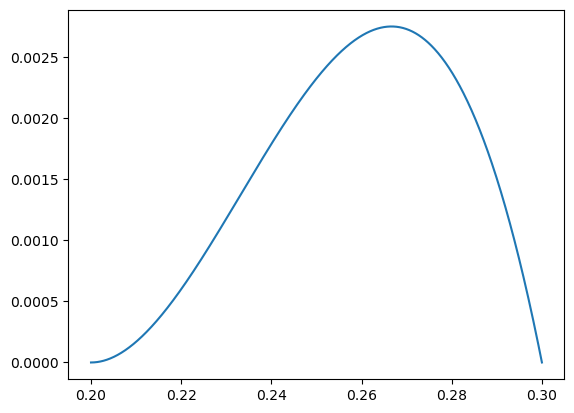

In [47]:
def absolute_error(x):
    return np.abs(f(x) - poly)
    
def approximate_error(x):
    return np.abs(absolute_error(x) / f(x))

plt.plot(x_axis, approximate_error(x_axis))
plt.show()

In [78]:
def lkn(k, nodes, x, n):
    res = 1
    for i in range(n):
        if i != k:
            res *= ((x - nodes[i]) - (nodes[k] - nodes[i]))
        return res
        
def lagrange_poly(n, values, nodes, x):
    poly = 0
    for k in range(n):
        poly += (values[i] * lkn(k, nodes, x, n))
    return poly
    
def Lagrange(n_, A_, B_, f_, x_):
    nodes = np.linspace( A_, B_, 1000)
    values = f_(nodes)
    poly = lagrange_poly(n_, values, nodes, x_)
    return poly